# House Prices - Advanced Regression Techniques

## Project Overview

This project aims to predict the final prices of residential homes based on various explanatory variables describing aspects of residential properties.  
We will be working with the well-known **Ames Housing dataset**, which contains 79 explanatory variables covering a wide range of property characteristics.

The objective is to develop a robust regression model that minimizes prediction error, measured by **Root Mean Squared Logarithmic Error (RMSLE)**.  
Throughout this notebook, we will follow a structured, professional workflow including:

- Initial data exploration
- Feature engineering
- Data cleaning and preprocessing
- Model building and evaluation
- Final submission preparation

The final deliverable will be a predictive model and accompanying insights regarding the key drivers of housing prices.

---

## Project Goal

> Build a model to accurately predict house sale prices based on provided property characteristics, ensuring strong generalization to unseen data.

![House Prices](https://raw.githubusercontent.com/Masterx-AI/Project_Housing_Price_Prediction_/main/hs.jpg)


<div style="background-color: #f9f9f9; border: 1px solid #ddd; border-radius: 8px; padding: 20px;">

#  Table of Contents

<ul style="list-style-type: square; line-height: 1.8;">
    <li><strong><a href="#project-overview">Project Overview</a></strong></li>
    <li><strong><a href="#data-loading">Data Loading</a></strong></li>
    <li><strong><a href="#exploratory-data-analysis-eda">Exploratory Data Analysis (EDA)</a></strong>
        <ul>
            <li><a href="#target-variable-analysis">Target Variable Analysis</a></li>
            <li><a href="#feature-analysis">Feature Analysis</a></li>
            <li><a href="#missing-value-analysis">Missing Value Analysis</a></li>
        </ul>
    </li>
    <li><strong><a href="#data-cleaning--preprocessing">Data Cleaning & Preprocessing</a></strong>
        <ul>
            <li><a href="#handling-missing-values">Handling Missing Values</a></li>
            <li><a href="#encoding-categorical-variables">Encoding Categorical Variables</a></li>
            <li><a href="#feature-engineering">Feature Engineering</a></li>
        </ul>
    </li>
    <li><strong><a href="#model-building">Model Building</a></strong>
        <ul>
            <li><a href="#baseline-model">Baseline Model</a></li>
            <li><a href="#advanced-models">Advanced Models</a></li>
        </ul>
    </li>
    <li><strong><a href="#model-evaluation">Model Evaluation</a></strong></li>
    <li><strong><a href="#final-submission">Final Submission</a></strong></li>
    <li><strong><a href="#conclusion">Conclusion</a></strong></li>
</ul>

</div>


## <a name="data-loading"></a>Data Loading

In this section, we will load the training and test datasets.  
We'll also create backup copies to preserve the original data throughout our exploration and modeling phases.


In [44]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Settings for better visuals
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [25]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

# Backup copies
train_original = train.copy()
test_original = test.copy()

# Quick checks
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

train.head()


Train shape: (1460, 81)
Test shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## <a name="initial-data-exploration"></a>Initial Data Exploration

<div style="background-color: #f9f9f9; border: 1px solid #ddd; border-radius: 8px; padding: 15px;">

In this section, we conduct a basic exploration to better understand the structure and quality of the dataset:

- Overview of the data types
- Inspection of missing values
- Identification of categorical and numerical features
- Examination of basic statistics for numerical variables

These initial insights will guide the data cleaning and feature engineering strategies that follow.
</div>


In [27]:
# Quick Overview of Dataset
def check_df(dataframe, head=5):
    print("Shape:", dataframe.shape)
    print("\nTypes:\n", dataframe.dtypes)
    print("\nHead:\n", dataframe.head(head))
    print("\nMissing Values:\n", dataframe.isnull().sum())
    num_cols = [col for col in dataframe.columns if dataframe[col].dtype in ['int64', 'float64']]
    print("\nQuantiles:\n", dataframe[num_cols].quantile([0, 0.05, 0.5, 0.95, 0.99, 1]).T)


# Grab Column Names by Data Types
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'Categorical columns: {len(cat_cols)}')
    print(f'Numerical columns: {len(num_cols)}')
    print(f'Categorical but Cardinal columns: {len(cat_but_car)}')
    return cat_cols, num_cols, cat_but_car

# Missing Values Table
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['Missing Values', 'Ratio (%)'])
    print(missing_df, end="\n\n")
    if na_name:
        return na_columns

# Categorical Summary with Optional Bar Plot
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio (%)": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.title(f"{col_name} Count Plot")
        plt.xticks(rotation=45)
        plt.show()

# Numerical Summary with Optional Histogram
def num_summary(dataframe, num_col, plot=False):
    quantiles = [0.05, 0.5, 0.95]
    print(dataframe[num_col].describe(quantiles).T)
    if plot:
        import matplotlib.pyplot as plt
        dataframe[num_col].hist(bins=20)
        plt.xlabel(num_col)
        plt.title(f"{num_col} Histogram")
        plt.show()


In [28]:
check_df(train)
cat_cols, num_cols, cat_but_car = grab_col_names(train)
missing_values_table(train)

Shape: (1460, 81)

Types:
 Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

Head:
    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg   
1   2          20       RL       80.000     9600   Pave   NaN      Reg   
2   3          60       RL       68.000    11250   Pave   NaN      IR1   
3   4          70       RL       60.000     9550   Pave   NaN      IR1   
4   5          60       RL       84.000    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2     

### <a name="missing-value-detection"></a> Missing Value Detection

Before handling missing values, we first visualize which features have missing data and how significant the missingness is.

We plot the top 15 features with the highest missing value ratios.

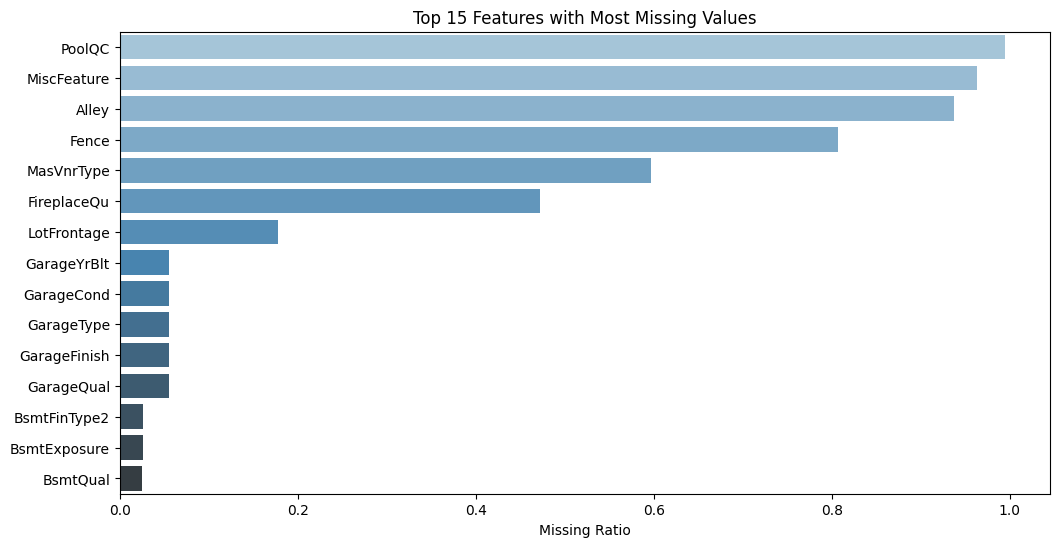

In [29]:
# Calculate missing ratios
missing_df = train.isnull().mean().sort_values(ascending=False)
missing_df = missing_df[missing_df > 0].head(15)  # only top 15

# Plot with seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_df.values, y=missing_df.index, palette="Blues_d")
plt.xlabel("Missing Ratio")
plt.title("Top 15 Features with Most Missing Values")
plt.show()


### Outlier Detection

Outliers can distort model training, particularly for regression tasks.  
Rather than removing them immediately, we first detect their presence in numerical features.

We use the **Interquartile Range (IQR) method**:

- **Q1** = 25th percentile (first quartile)
- **Q3** = 75th percentile (third quartile)
- **IQR** = Q3 - Q1
- **Lower Bound** = Q1 - 1.5 × IQR
- **Upper Bound** = Q3 + 1.5 × IQR

An observation is considered an outlier if it falls outside these bounds:

$$
\text{Lower Bound} = Q1 - 1.5 \times (Q3 - Q1)
$$

$$
\text{Upper Bound} = Q3 + 1.5 \times (Q3 - Q1)
$$

We only **detect** outliers at this stage to inform future steps;  
no removal or imputation is performed yet.


In [41]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def grab_outliers(dataframe, col_name, index=False):
    up_limit, low_limit = outlier_thresholds(dataframe, col_name)

    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].shape[0] > 10:
        print(dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].head())
    else:
        print(dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)])

    if index:
        outliers_index = dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].index
        return outliers_index


In [43]:
for col in num_cols:
    print(col,check_outlier(train,col))

Id False
MSSubClass True
LotFrontage True
LotArea True
OverallQual True
YearBuilt True
YearRemodAdd False
MasVnrArea True
BsmtFinSF1 True
BsmtFinSF2 True
BsmtUnfSF True
TotalBsmtSF True
1stFlrSF True
2ndFlrSF True
LowQualFinSF True
GrLivArea True
TotRmsAbvGrd True
GarageYrBlt False
GarageArea True
WoodDeckSF True
OpenPorchSF True
EnclosedPorch True
3SsnPorch True
ScreenPorch True
MiscVal True
MoSold False
SalePrice True


## <a name="target-variable-analysis"></a>Target Variable Analysis: SalePrice

The target variable in this competition is `SalePrice`, which represents the final sale price of a house.

Understanding its distribution is crucial because:
- Regression models perform better when the target is normally distributed.
- The evaluation metric (RMSLE) penalizes underestimation more heavily than overestimation.
- Log-transforming a skewed target often improves model performance.

In this step, we will:
- Visualize the distribution of `SalePrice`
- Compute its skewness
- Apply a log-transformation to reduce skewness


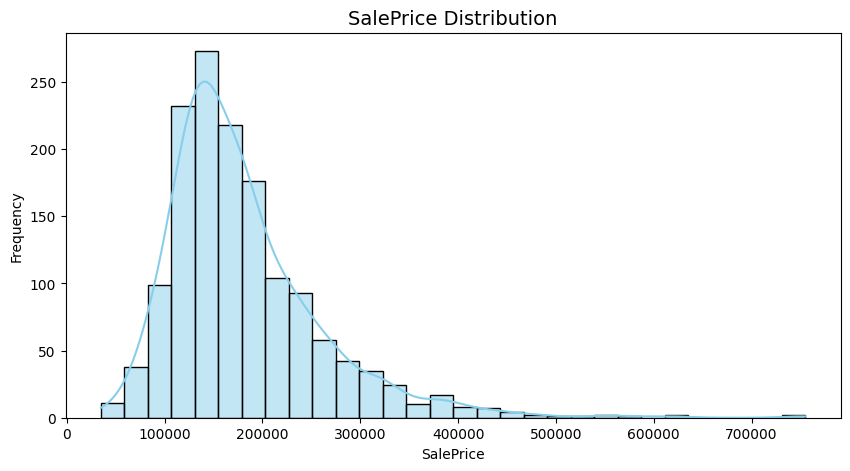

Skewness before log transformation: 1.8829


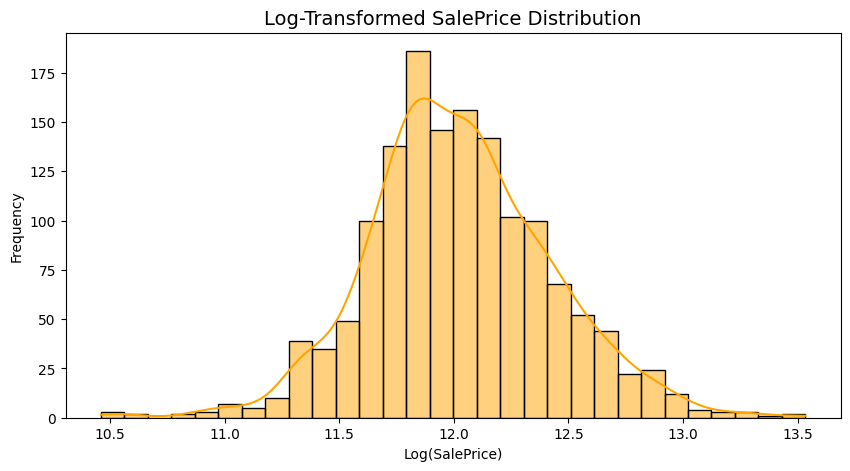

Skewness after log transformation: 0.1213


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Visualize original distribution
plt.figure(figsize=(10, 5))
sns.histplot(train["SalePrice"], kde=True, bins=30, color="skyblue")
plt.title("SalePrice Distribution", fontsize=14)
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

# Check skewness
original_skew = train["SalePrice"].skew()
print(f"Skewness before log transformation: {original_skew:.4f}")

# Apply log1p transformation
train["SalePrice_log"] = np.log1p(train["SalePrice"])

# Visualize transformed distribution
plt.figure(figsize=(10, 5))
sns.histplot(train["SalePrice_log"], kde=True, bins=30, color="orange")
plt.title("Log-Transformed SalePrice Distribution", fontsize=14)
plt.xlabel("Log(SalePrice)")
plt.ylabel("Frequency")
plt.show()

# Check new skewness
log_skew = train["SalePrice_log"].skew()
print(f"Skewness after log transformation: {log_skew:.4f}")


## <a name="feature-analysis"></a>Numerical Feature Analysis (Correlation with SalePrice)

Now that we've prepared a normalized version of the target variable (`SalePrice_log`),  
we will explore how other numerical features relate to it.

We will:
- Compute the correlation matrix
- Identify top correlated variables with the target
- Visualize them using a heatmap

These insights will help us focus on the most relevant features during modeling.



Top 10 correlated features with SalePrice_log:

SalePrice_log   1.000
SalePrice       0.948
OverallQual     0.817
GrLivArea       0.701
GarageArea      0.651
TotalBsmtSF     0.612
1stFlrSF        0.597
YearBuilt       0.587
YearRemodAdd    0.566
GarageYrBlt     0.541
TotRmsAbvGrd    0.534
Name: SalePrice_log, dtype: float64


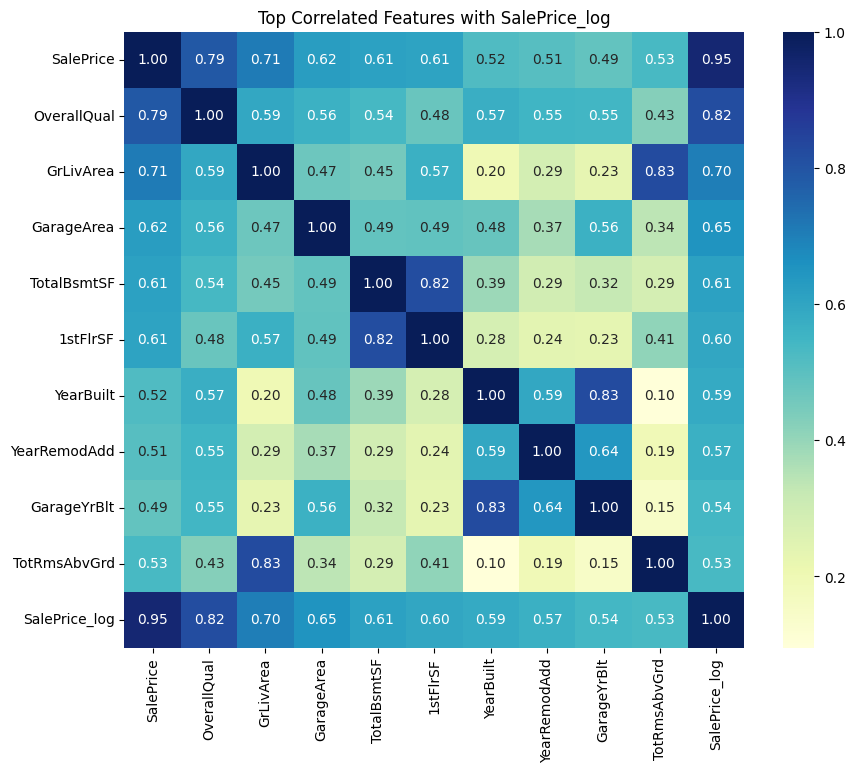

In [31]:
numeric_df = train[num_cols + ["SalePrice_log"]]  # include the target

#Correlation matrix
corr_matrix = numeric_df.corr()

# Correlation with SalePrice_log
corr_target = corr_matrix["SalePrice_log"].sort_values(ascending=False)
print("Top 10 correlated features with SalePrice_log:\n")
print(corr_target.head(11))  # include SalePrice_log itself

#Visualize top correlated features
top_corr_features = corr_target.drop("SalePrice_log").head(10).index.tolist()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(train[top_corr_features + ["SalePrice_log"]].corr(), annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Top Correlated Features with SalePrice_log")
plt.show()


### Removing Highly Correlated Numerical Features

To reduce multicollinearity, we identify and remove numerical features that are strongly correlated with each other (correlation > 0.90).  
Keeping both in the model can lead to unstable coefficients and redundant information.

We use a helper function to:
- Compute pairwise correlations
- Visualize the matrix
- Drop one of each strongly correlated pair


No highly correlated features found.


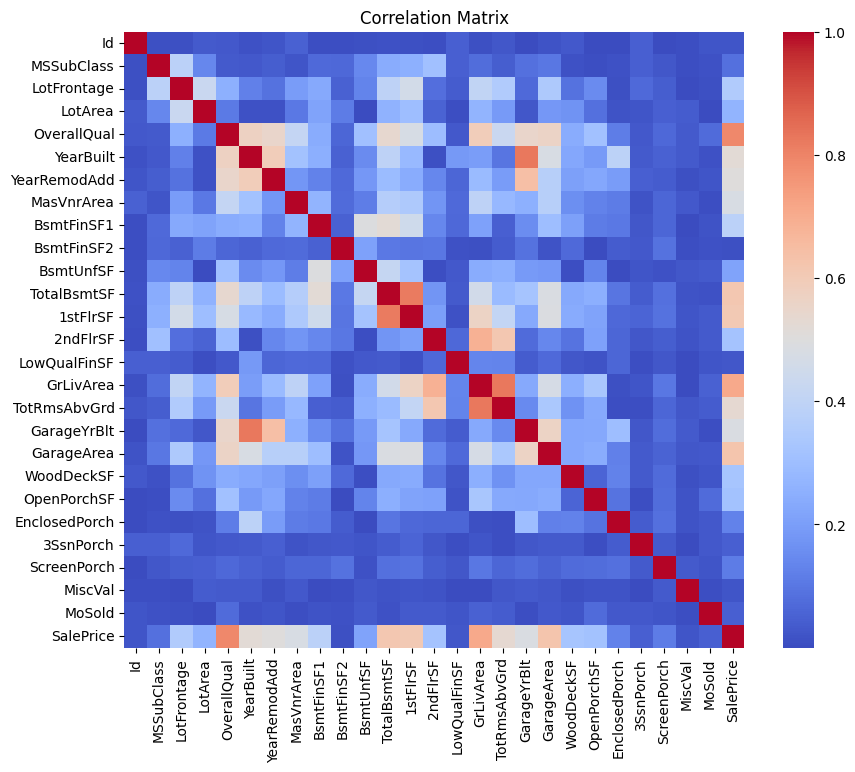

In [33]:

def high_correlated_cols(dataframe, plot=False, corr_th=0.90, verbose=True):
    corr_matrix = dataframe.corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    drop_list = []
    dropped_pairs = []

    for col in upper_triangle.columns:
        high_corr = upper_triangle[col][upper_triangle[col] > corr_th]
        if not high_corr.empty:
            drop_list.append(col)
            if verbose:
                for idx in high_corr.index:
                    dropped_pairs.append((col, idx, upper_triangle[col][idx]))

    if verbose and dropped_pairs:
        print(f"Highly correlated pairs (>{corr_th}):\n")
        for col1, col2, corr in dropped_pairs:
            print(f" - {col1} ↔ {col2}: {corr:.2f}")
    elif verbose:
        print("No highly correlated features found.")

    if plot:
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
        plt.title("Correlation Matrix")
        plt.show()

    return drop_list

# Apply to numerical features
high_corr_cols = high_correlated_cols(train[num_cols], plot=True, corr_th=0.90)

# Drop them from train/test
train.drop(columns=high_corr_cols, inplace=True)
test.drop(columns=high_corr_cols, inplace=True)

# Update num_cols list
num_cols = [col for col in num_cols if col not in high_corr_cols]


## <a name="categorical-feature-analysis"></a>Categorical Feature Analysis (Impact-Based Selection)

Rather than arbitrarily choosing categorical features to analyze,  
we use a **data-driven approach** to identify which categorical variables are most relevant to predicting house prices.

### Methodology:
- We examine all categorical variables with fewer than 20 unique categories (to keep visuals interpretable)
- For each, we compute the **mean of the target variable (`SalePrice_log`)** within each category
- We then calculate the **range of these group means** (max - min) as a simple indicator of impact
- Variables with the **largest spread in group means** are considered the most informative

This method highlights categorical features that have the **strongest influence** on housing prices.

We then visualize the top 5 most impactful features using bar plots.


In [36]:
# Create a dictionary to store variance in group means
impact_scores = {}

# Analyze all categorical variables (except those with too many categories)
for col in cat_cols:
    if train[col].nunique() < 20 and col != 'SalePrice_log':
        group_means = train.groupby(col)["SalePrice_log"].mean()
        impact_range = group_means.max() - group_means.min()
        impact_scores[col] = impact_range

# Sort categorical features by impact (descending)
impact_scores = dict(sorted(impact_scores.items(), key=lambda item: item[1], reverse=True))

# Select top N impactful categorical variables to plot
top_cat_cols = list(impact_scores.keys())[:5]

# Print top impactful columns
print("Top Categorical Features by Impact on SalePrice_log:\n")
for i, col in enumerate(top_cat_cols, 1):
    print(f"{i}. {col} (Impact range: {impact_scores[col]:.2f})")


Top Categorical Features by Impact on SalePrice_log:

1. PoolArea (Impact range: 1.54)
2. ExterQual (Impact range: 1.46)
3. Exterior1st (Impact range: 1.32)
4. Condition2 (Impact range: 1.26)
5. OverallCond (Impact range: 1.18)


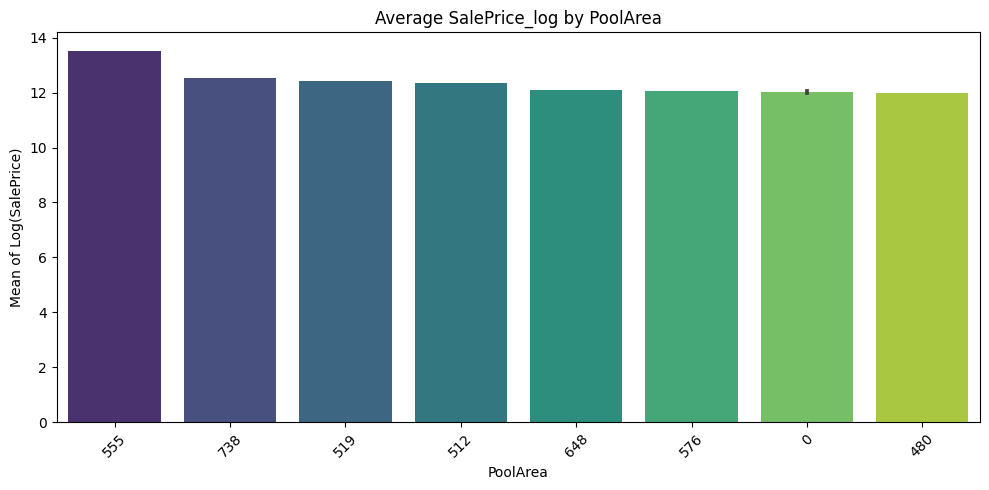

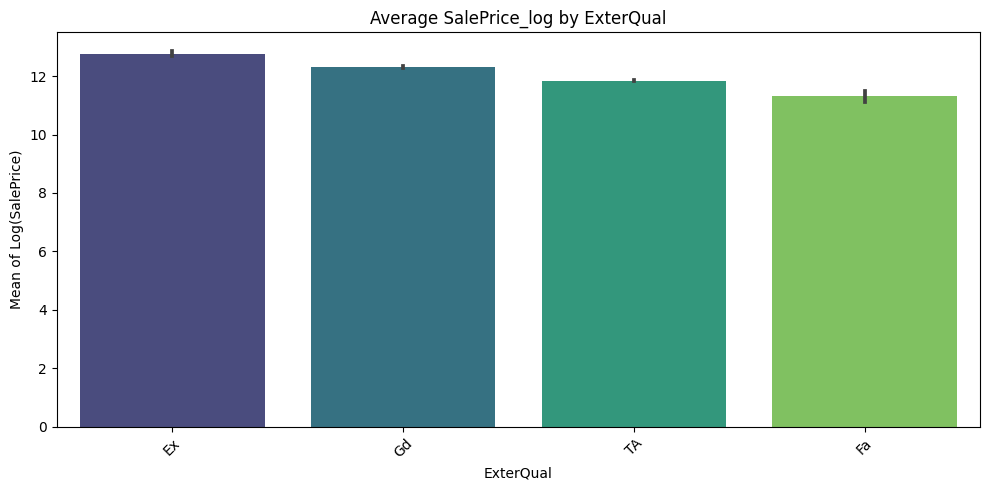

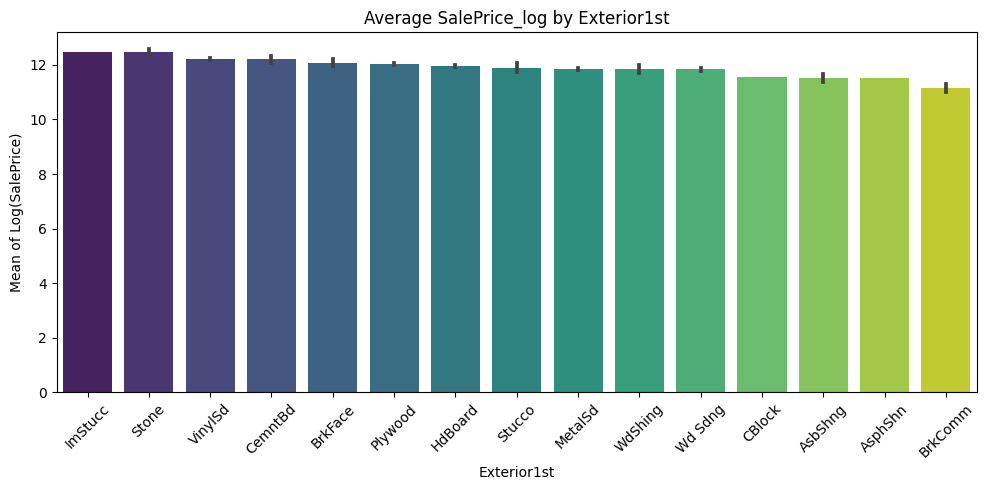

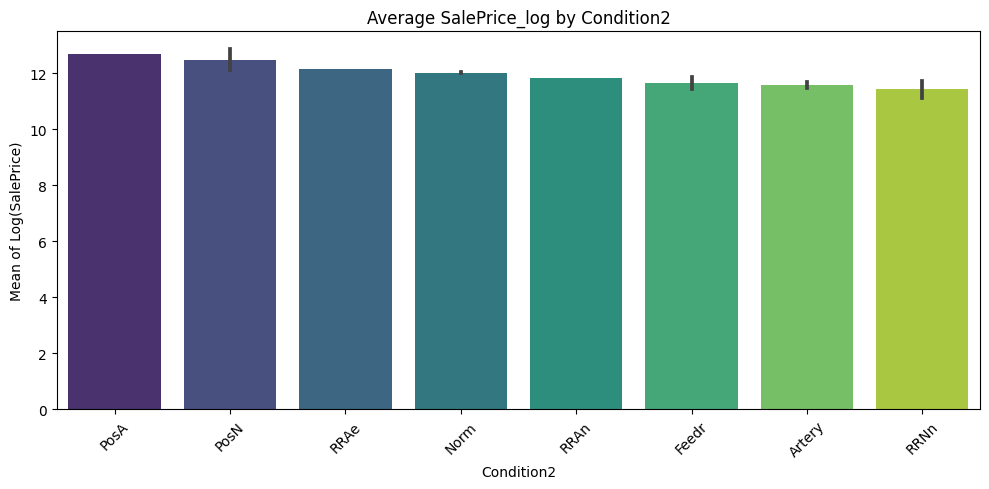

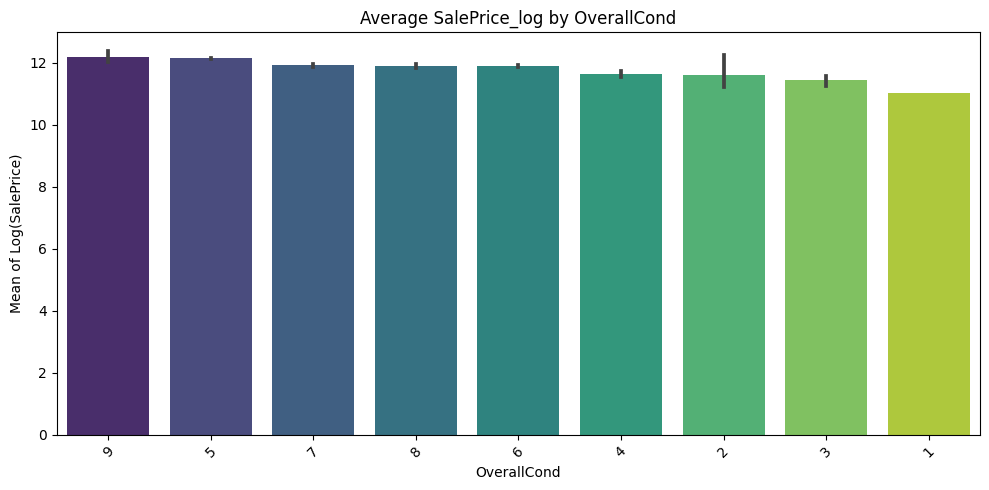

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: PoolArea, Length: 1460, dtype: int64

In [38]:
# Visualize top impactful categorical variables
for col in top_cat_cols:
    order = train.groupby(col)["SalePrice_log"].mean().sort_values(ascending=False).index
    plt.figure(figsize=(10, 5))
    sns.barplot(x=col, y="SalePrice_log", data=train, order=order, palette="viridis")
    plt.title(f"Average SalePrice_log by {col}")
    plt.xticks(rotation=45)
    plt.ylabel("Mean of Log(SalePrice)")
    plt.tight_layout()
    plt.show()


train['PoolArea'].nunique
